In [2]:
import pandas as pd
import numpy as np

In [6]:
df= pd.read_csv('advertising.csv')
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [8]:
# since the data is already clean we can proceed with the training and testing
from sklearn.model_selection import train_test_split
# we specify this so that the train test data set always have the sane rows, respectivelt
np.random.seed(0)
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3, random_state=100)

In [10]:
y_train=df_train.pop('Sales')
x_train=df_train

In [14]:
# now we scale the data in the range 0-1
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler= MinMaxScaler()

In [18]:
#apply scaler to all the columns except the yes-no and dummy varriables
num_vars=['TV','Radio','Newspaper']
df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [20]:
df_train.head()

,TV,Radio,Newspaper
74,0.719310,0.495968,0.112577
3,0.509976,0.832661,0.511873
185,0.690903,0.909274,0.169745
26,0.480893,0.590726,0.108179
90,0.451809,0.098790,0.079156


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

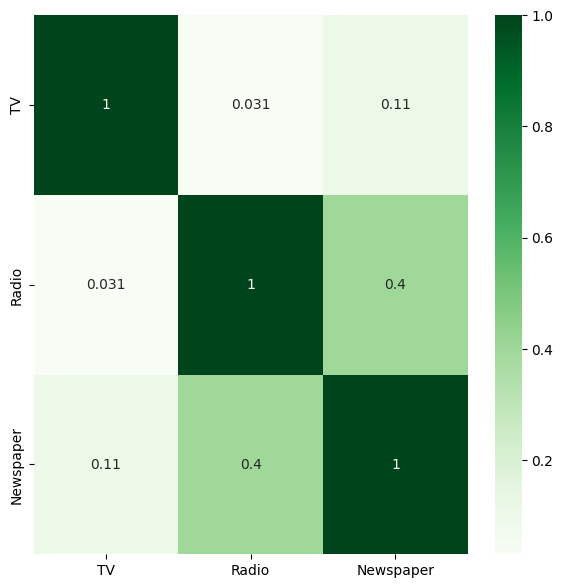

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(df_train.corr(),cmap='Greens',annot=True)
plt.show()

In [47]:
import statsmodels.api as sm
# add constant 
x_train_lm = sm.add_constant(x_train)

# create first fitted model 
lr = sm.OLS(y_train,x_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           4.73e-71
Time:                        11:36:38   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3742      0.356     12.292      0.000       3.670       5.078
TV            15.9173      0.461     34.539      0.000      15.006      16.829
Radio          5.4566      0.514     10.609      0.000       4.439       6.474
Newspaper      0.7152      0.793      0.902      0.369      -0.853       2.283
==============================================================================
Omnibus:                       18.669   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.404
Skew:                          -0.643   Prob(JB):                     1.52e-07
Kurtosis:                       4.932   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#check for the variation factor of the features 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#creating dataframe that will have all the featues variable and there vif factor
vif=pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= "VIF",ascending=False)
vif

,Features,VIF
2,Newspaper,3.23
1,Radio,3.20
0,TV,2.33


In [53]:
x=x_train.drop(['Newspaper'],axis=1)

In [57]:
# building the 2nd fitted model
x_train_lm=sm.add_constant(x)
lr_2= sm.OLS(y_train,x_train_lm).fit()

In [59]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     692.3
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           2.38e-72
Time:                        11:45:18   Log-Likelihood:                -271.02
No. Observations:                 140   AIC:                             548.0
Df Residuals:                     137   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4629      0.342     13.060      0.000       3.787       5.139
TV            15.9607      0.458     34.848      0.000      15.055      16.866
Radio          5.6417      0.471     11.970      0.000       4.710       6.574
==============================================================================
Omnibus:                       21.428   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.728
Skew:                          -0.716   Prob(JB):                     6.42e-09
Kurtosis:                       5.102   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the R-squared and adj R-squared is not increasing so droping newspaper was not significant and we may or may not drop it 
the close the R-squared to 1 the better the model is

In [66]:
# now checking the prediction on the test data
y_test= df_test.pop('Sales')
x_test= df_test

In [70]:
num_vars=['TV','Newspaper','Radio']

df_test[num_vars]= scaler.fit_transform(df_test[num_vars])

In [72]:
df_test.head()

,TV,Radio,Newspaper
126,0.000000,0.787368,0.561582
104,0.956017,0.690526,0.049718
99,0.528631,0.846316,0.508475
92,0.870954,0.673684,0.656497
111,0.970539,0.768421,0.251977


In [98]:
y_test=scaler.fit_transform(y_test)

In [100]:
import statsmodels.api as sm
# add constant 
x_test_lm = sm.add_constant(x_test)

# create first fitted model 
lr = sm.OLS(y_test,x_test_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     152.5
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           6.50e-27
Time:                        12:05:40   Log-Likelihood:                 68.083
No. Observations:                  60   AIC:                            -128.2
Df Residuals:                      56   BIC:                            -119.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0037      0.031      0.119      0.906      -0.059       0.066
TV             0.7239      0.038     18.809      0.000       0.647       0.801
Radio          0.2311      0.037      6.316      0.000       0.158       0.304
Newspaper     -0.0659      0.049     -1.337      0.187      -0.165       0.033
==============================================================================
Omnibus:                        2.692   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                2.599
Skew:                           0.457   Prob(JB):                        0.273
Kurtosis:                       2.548   Cond. No.                         6.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#dropping variables
x=x_test.drop(['Newspaper', axis=1]
# building the 2nd fitted model
x_test_lm=sm.add_constant(x)
lr_2= sm.OLS(y_test,x_test_lm).fit()


In [ ]:
#check for the variation factor of the features 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
#creating dataframe that will have all the featues variable and there vif factor
vif=pd.DataFrame()
vif['Features'] = x_test.columns
vif['VIF'] = [variance_inflation_factor(x_test.values,i) for i in range (x_test.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= "VIF",ascending=False)
vif

,Features,VIF
1,Radio,3.53
0,TV,2.88
2,Newspaper,2.54


In [120]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     692.3
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           2.38e-72
Time:                        12:22:26   Log-Likelihood:                -271.02
No. Observations:                 140   AIC:                             548.0
Df Residuals:                     137   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4629      0.342     13.060      0.000       3.787       5.139
TV            15.9607      0.458     34.848      0.000      15.055      16.866
Radio          5.6417      0.471     11.970      0.000       4.710       6.574
==============================================================================
Omnibus:                       21.428   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.728
Skew:                          -0.716   Prob(JB):                     6.42e-09
Kurtosis:                       5.102   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
y_pred=lr.predict(x_test_lm)

Text(0, 0.5, 'y_pred')

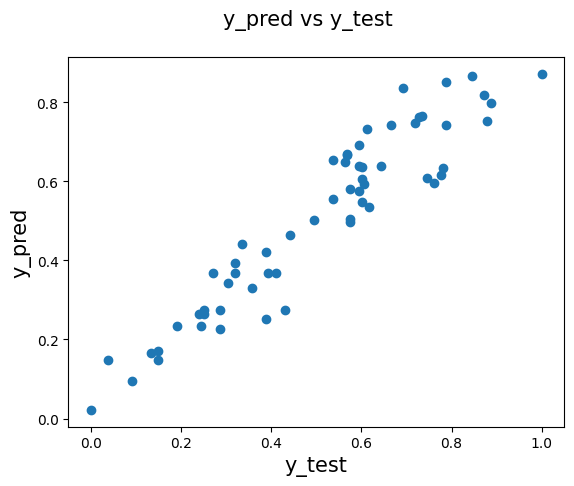

In [124]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
plt.plot(
fig.suptitle('y_pred vs y_test',fontsize = 15)
plt.xlabel('y_test',fontsize = 15)
plt.ylabel('y_pred',fontsize = 15)
